<a href="https://colab.research.google.com/github/Kggzzz/KKU_data_mining/blob/master/KmeanClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=300, centers=3,n_features=2, random_state=6)

#n_samples=300 สุ่มจดขึ้นมา 300 จุด 
#centers=3 มีcenters 3 
#n_features=2 บอกว่าจะมีกี่กลุ่ม 
#random_state=6 การสุ่มที่กำหนดไว้ ให้ผลมีค่าเท่าเดิม และฟิคให้ค่าของแต่ละคนเท่ากัน

In [3]:
X.shape
#มีข้อมูลทั้งหมด 300 แถว 2 หลัก

(300, 2)

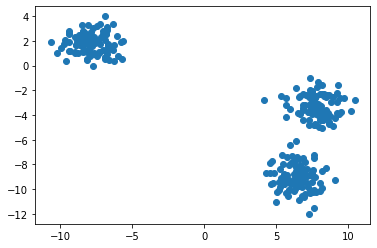

In [6]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

#พลอตออกมาได้ทั้งหมด 3 กลุ่มตามที่กำหนด 

#K-mean

Import

In [7]:
from sklearn.cluster import KMeans

Define

In [14]:
KMclust = KMeans(n_clusters=5)
#การแบ่งกลุ่ม

Train

In [15]:
KMclust.fit(X)
#ตัวข้อมูลไม่มีตัว y เราก็จะใส่แค่ x เพื่อให้มีการจับกลุ่ม

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Test/Predict

In [16]:
label = KMclust.predict(X)
#นำตัวเดิมที่เรา trian แล้สนำมา predict เพื่อดูว่าจะอยู่ในกลุ่มไหน

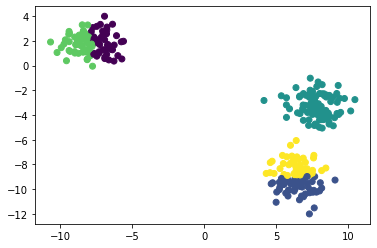

In [17]:
plt.scatter(X[:,0], X[:,1], c=label) 

#จากนั้นนำกลุ่มที่แบ่งได้ให้คนที่เป็น external มาดู

Color quantization (application of kmean)

In [18]:
from google.colab import drive 
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'

Mounted at /content/drive


In [19]:
import cv2 #ใช้เกี่ยวกับรูปภาพ
import os #osเพื่อจัดการไฟล์

In [20]:
img = cv2.imread(os.path.join(path,'baboon.jpg'))

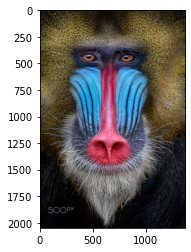

In [21]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [22]:
RGB_img.shape

(2048, 1366, 3)

count unique color

In [23]:
import numpy as np

In [24]:
np.unique(RGB_img).shape

(256,)

##Use K-mean to reduce color from 256 colors to 8 colors

In [27]:
#Define
myQuantize = KMeans(n_clusters=8)

In [30]:
#resheap เพื่อมให้เป็น 2 มิติ
img_row = np.reshape(RGB_img,(2048*1366, 3))
img_row

array([[11, 15,  1],
       [ 5,  9,  0],
       [ 3,  4,  0],
       ...,
       [ 8,  9, 13],
       [ 9, 10, 14],
       [ 8,  9, 13]], dtype=uint8)

In [31]:
#train โดยปกติ X จะมีแค่แถวกับหลักเป็น 2 มิติแต่รูปภาพมี 3 มิติ เราจึงต้องยุบแถวกับหลักให้เหลือ 2 มิติ
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
#Predict 
res = myQuantize.predict(img_row)

In [33]:
res

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

## Get cluster centers

In [34]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[ 74.41425783,  82.9567331 ,  98.99846285],
       [ 11.48111925,  11.08037913,  10.07489694],
       [103.87022815,  85.58643665,  51.7089552 ],
       [192.32771546, 166.90486232, 168.52242917],
       [181.78412886,  62.68310046,  91.45184496],
       [ 52.81464129,  44.89048517,  31.54110075],
       [136.77967787, 127.76416759, 110.58885929],
       [ 68.34647742, 160.50788343, 213.30676774]])

In [36]:
Clus_cen.shape

(8, 3)

## Map color name back to image 
แมพสีที่เรามีอยู่ตามกลุ่มสีที่เป้นตัวแทน 

In [35]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]) : 
    for j in range (RGB_img.shape[1]) : 
        new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [37]:
new_img_ = new_img/255

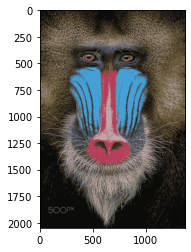

In [38]:
plt.imshow(new_img_)